In [3]:
Glassnode API | Python

Tutor : Adam Getbags

import json
import requests
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import plot


# insert your API key here
API_KEY = '2It9FiAZB1mHp7VcjmmI9XzjPp4'

"""
make API request to get all endpoints
"""
res = requests.get(
    'https://api.glassnode.com/v2/metrics/endpoints',
    params={'api_key': API_KEY}
)

# convert to pandas dataframe
endpointData = pd.read_json(res.text)

# review endpoint data
print(endpointData.columns)

Index(['path', 'tier', 'assets', 'currencies', 'resolutions', 'formats'], dtype='object')


In [4]:
# view all endpoint URLs
print(endpointData.path)

0       /v1/metrics/addresses/sending_to_exchanges_count
1      /v1/metrics/addresses/receiving_from_exchanges...
2                            /v1/metrics/addresses/count
3                    /v1/metrics/addresses/sending_count
4                  /v1/metrics/addresses/receiving_count
                             ...                        
497        /v1/metrics/institutions/qbtc_premium_percent
498                /v1/metrics/institutions/qbtc_aum_sum
499       /v1/metrics/institutions/qbtc_market_price_usd
500           /v1/metrics/institutions/qbtc_holdings_sum
501              /v1/metrics/institutions/qbtc_flows_sum
Name: path, Length: 502, dtype: object


In [5]:
# view specific endpoint
print(endpointData.path[0])

/v1/metrics/addresses/sending_to_exchanges_count


In [6]:
# view specific endpoint tier
print(endpointData.tier[0])

3


In [7]:
# all endpoints for specific tier 
print(endpointData.path[endpointData.tier == 1])

2                            /v1/metrics/addresses/count
3                    /v1/metrics/addresses/sending_count
4                  /v1/metrics/addresses/receiving_count
5                     /v1/metrics/addresses/active_count
6               /v1/metrics/addresses/new_non_zero_count
                             ...                        
492                    /v1/metrics/signals/altcoin_index
493                   /v1/metrics/signals/btc_risk_index
494              /v1/metrics/signals/mcap_returns_vs_btc
495    /v1/metrics/signals/l1_native_tokens_returns_v...
496         /v1/metrics/signals/ecosystem_momentum_index
Name: path, Length: 73, dtype: object


In [8]:
# all endpoints for specific tier AND lower
print(endpointData.path[endpointData.tier <= 2])

2                         /v1/metrics/addresses/count
3                 /v1/metrics/addresses/sending_count
4               /v1/metrics/addresses/receiving_count
5                  /v1/metrics/addresses/active_count
6            /v1/metrics/addresses/new_non_zero_count
                            ...                      
497     /v1/metrics/institutions/qbtc_premium_percent
498             /v1/metrics/institutions/qbtc_aum_sum
499    /v1/metrics/institutions/qbtc_market_price_usd
500        /v1/metrics/institutions/qbtc_holdings_sum
501           /v1/metrics/institutions/qbtc_flows_sum
Name: path, Length: 336, dtype: object


In [9]:
# find index/row number of endpoint by path
endpointRow = endpointData[
                endpointData.path == '/v1/metrics/market/price_usd_ohlc']
print(endpointRow)

                                  path  tier  \
355  /v1/metrics/market/price_usd_ohlc     1   

                                                assets currencies resolutions  \
355  [{'symbol': 'BTC', 'name': 'Bitcoin', 'tags': ...   [NATIVE]   [1h, 24h]   

         formats  
355  [JSON, CSV]  


In [10]:
# supported assets by endpoint // in a DataFrame
print(pd.DataFrame(endpointData.assets[endpointRow.index[0]]))

    symbol             name                    tags
0      BTC          Bitcoin                   [top]
1      ETH         Ethereum                   [top]
2      LTC         Litecoin                   [top]
3     TUSD          TrueUSD     [erc20, stablecoin]
4    stETH  Lido Staked ETH                 [erc20]
..     ...              ...                     ...
124  ARMOR            ARMOR           [erc20, defi]
125    DHT       dHedge DAO           [erc20, defi]
126  Nsure    Nsure Network           [erc20, defi]
127    NDX  Indexed Finance           [erc20, defi]
128    DDX        DerivaDAO  [erc20, exchangeToken]

[129 rows x 3 columns]


In [11]:
# view data resolution, granularity
print(endpointData.resolutions[endpointRow.index[0]])

['1h', '24h']


In [12]:
"""
make API request to get candlestick data
"""
res = requests.get(
    'https://api.glassnode.com/v1/metrics/market/price_usd_ohlc',
    params={'a': 'BTC', 'api_key': API_KEY, 'i': '24h'}
)

In [13]:
res = requests.get(
    'https://api.glassnode.com/v1/metrics/market/price_usd_ohlc',
    params={'a': 'BTC', 'api_key': API_KEY, 'i': '1h'}
)

In [14]:
# convert to pandas dataframe
candleData = pd.read_json(res.text, convert_dates=['t'])

In [16]:
# rename columns
candleData = candleData.rename(columns={'t': 'Date', 'o': 'Candles'})

candleData

,Date,Candles
0,2010-07-17 23:00:00,"{'c': 0.049510000000000005, 'h': 0.04951000000..."
1,2010-07-18 00:00:00,"{'c': None, 'h': None, 'l': None, 'o': None}"
2,2010-07-18 01:00:00,"{'c': None, 'h': None, 'l': None, 'o': None}"
3,2010-07-18 02:00:00,"{'c': None, 'h': None, 'l': None, 'o': None}"
4,2010-07-18 03:00:00,"{'c': 0.059410000000000004, 'h': 0.05941000000..."
...,...,...
108769,2022-12-14 00:00:00,"{'c': 17796.33046740403, 'h': 17817.0094761170..."
108770,2022-12-14 01:00:00,"{'c': 17783.295832929907, 'h': 17809.881734934..."
108771,2022-12-14 02:00:00,"{'c': 17775.933631992448, 'h': 17787.211415957..."
108772,2022-12-14 03:00:00,"{'c': 17804.699159903983, 'h': 17828.659237197..."


In [17]:
# set index to date
candleData = candleData.set_index('Date')

candleData

,Candles
Date,
2010-07-17 23:00:00,"{'c': 0.049510000000000005, 'h': 0.04951000000..."
2010-07-18 00:00:00,"{'c': None, 'h': None, 'l': None, 'o': None}"
2010-07-18 01:00:00,"{'c': None, 'h': None, 'l': None, 'o': None}"
2010-07-18 02:00:00,"{'c': None, 'h': None, 'l': None, 'o': None}"
2010-07-18 03:00:00,"{'c': 0.059410000000000004, 'h': 0.05941000000..."
...,...
2022-12-14 00:00:00,"{'c': 17796.33046740403, 'h': 17817.0094761170..."
2022-12-14 01:00:00,"{'c': 17783.295832929907, 'h': 17809.881734934..."
2022-12-14 02:00:00,"{'c': 17775.933631992448, 'h': 17787.211415957..."


In [18]:
# turn candle dictionaries into individual series
candleData = candleData.Candles.apply(pd.Series)

In [19]:
# rename columns
candleData = candleData.rename(columns={'c': 'Close', 'h': 'High', 
                                        'l': 'Low', 'o': 'Open'})

In [20]:
candleData

,Close,High,Low,Open
Date,,,,
2010-07-17 23:00:00,0.049510,0.049510,0.049510,0.049510
2010-07-18 00:00:00,NaN,NaN,NaN,NaN
2010-07-18 01:00:00,NaN,NaN,NaN,NaN
2010-07-18 02:00:00,NaN,NaN,NaN,NaN
2010-07-18 03:00:00,0.059410,0.059410,0.059410,0.059410
...,...,...,...,...
2022-12-14 00:00:00,17796.330467,17817.009476,17765.547430,17778.890661
2022-12-14 01:00:00,17783.295833,17809.881735,17783.295833,17797.241178
2022-12-14 02:00:00,17775.933632,17787.211416,17765.650353,17787.211416


In [21]:
# generate plotly figure
fig = go.Figure(data=[go.Candlestick(x=candleData.index,
                open=candleData['Open'],
                high=candleData['High'],
                low=candleData['Low'],
                close=candleData['Close'])])

# open figure in browser
plot(fig, auto_open=True)

'temp-plot.html'

In [34]:
"""
make request to get total addresses // BTC
"""
res = requests.get(
    'https://api.glassnode.com/v1/metrics/addresses/count',
    params={'a': 'BTC', 'api_key': API_KEY}
)

In [35]:
# convert to pandas dataframe
addressData = pd.read_json(res.text, convert_dates=['t'])

In [36]:
# rename columns
addressData = addressData.rename(columns={'t': 'Date', 'v': 'numAddresses'})

In [37]:
# set index to date
addressData = addressData.set_index('Date')

In [38]:
addressData

,numAddresses
Date,
2009-01-03,1
2009-01-04,1
2009-01-05,1
2009-01-06,1
2009-01-07,1
...,...
2022-12-09,1061380122
2022-12-10,1061785329
2022-12-11,1062168652


<AxesSubplot:xlabel='Date'>

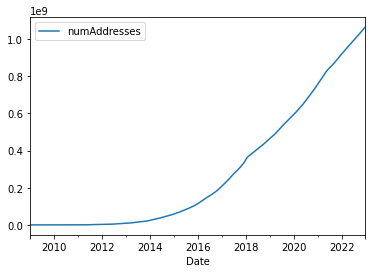

In [39]:
# plot address data
addressData.plot()

In [40]:
# make request to get total addresses // ETH
res2 = requests.get(
    'https://api.glassnode.com/v1/metrics/addresses/count',
    params={'a': 'ETH', 'api_key': API_KEY}
)

In [41]:
# convert to pandas dataframe
addressData2 = pd.read_json(res2.text, convert_dates=['t'])

In [42]:
# rename columns
addressData2 = addressData2.rename(columns={'t': 'Date', 'v': 'numAddresses'})

In [43]:
# set index to date
addressData2 = addressData2.set_index('Date')

In [44]:
addressData2

,numAddresses
Date,
2015-07-30,9203
2015-07-31,9359
2015-08-01,9474
2015-08-02,9561
2015-08-03,9637
...,...
2022-12-09,167722667
2022-12-10,167850172
2022-12-11,167960529


<AxesSubplot:xlabel='Date'>

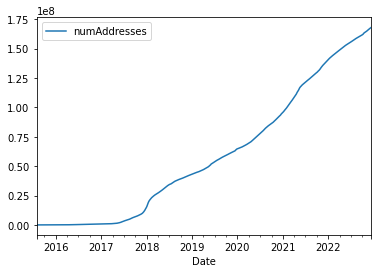

In [45]:
# plot address data
addressData2.plot()

In [47]:
"""
make a request to get Spent Output Profit Ratio // SOPR // BTC
"""
res3 = requests.get(
    'https://api.glassnode.com/v1/metrics/indicators/sopr',
    params={'a': 'BTC', 'api_key': API_KEY}
)

In [48]:
# convert to pandas dataframe
soprData = pd.read_json(res3.text, convert_dates=['t'])

In [49]:
# rename columns
soprData = soprData.rename(columns={'t': 'Date', 'v': 'SOPR'})

In [50]:
# set index to date
soprData = soprData.set_index('Date')

<AxesSubplot:xlabel='Date'>

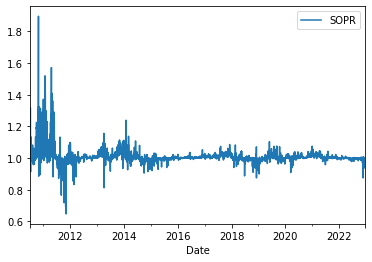

In [51]:
# plot address data
soprData.plot()

In [52]:
"""
make a request to get Spent Output Profit Ratio // SOPR // ETH
"""
res4 = requests.get(
    'https://api.glassnode.com/v1/metrics/indicators/sopr',
    params={'a': 'ETH', 'api_key': API_KEY}
)

In [58]:
# convert to pandas dataframe
soprData2 = pd.read_json(res4.text, convert_dates=['t'])

In [59]:
# rename columns
soprData2 = soprData2.rename(columns={'t': 'Date', 'v': 'SOPR'})

In [60]:
# set index to date
soprData2 = soprData2.set_index('Date')

<AxesSubplot:xlabel='Date'>

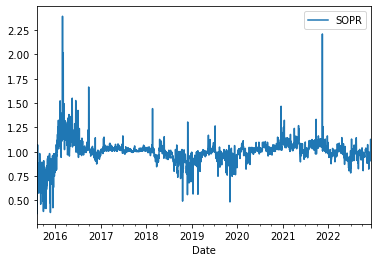

In [61]:
# plot address data
soprData2.plot()

In [62]:
"""
make a request to get % supply last active 1+ years ago // BTC
"""

res5 = requests.get(
    'https://api.glassnode.com/v1/metrics/supply/active_more_1y_percent',
    params={'a': 'BTC', 'api_key': API_KEY}
)

In [63]:
# convert to pandas dataframe
supplyData = pd.read_json(res5.text, convert_dates=['t'])

In [64]:
# rename columns
supplyData = supplyData.rename(columns={'t': 'Date', 'v': 'LongTermSupply'})

In [65]:
# set index to date
supplyData = supplyData.set_index('Date')

<AxesSubplot:xlabel='Date'>

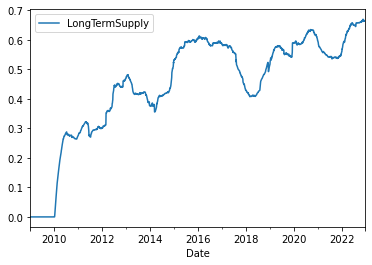

In [66]:
# plot address data
supplyData.plot()

In [78]:
"""
make a request to get % supply last active 1+ years ago // ETH
"""

res6 = requests.get(
    'https://api.glassnode.com/v1/metrics/supply/active_more_1y_percent',
    params={'a': 'ETH', 'api_key': API_KEY}
)

In [79]:
# convert to pandas dataframe
supplyData2 = pd.read_json(res6.text, convert_dates=['t'])

In [75]:
# rename columns
supplyData2 = supplyData2.rename(columns={'t': 'Date', 'v': 'LongTermSupply'})

In [77]:
# plot address data
supplyData2.plot()

TypeError: no numeric data to plot

In [80]:
"""
make a request to get pi cycle top data
"""

res7 = requests.get(
    'https://api.glassnode.com/v1/metrics/indicators/pi_cycle_top',
    params={'a': 'BTC', 'api_key': API_KEY}
)

In [81]:
# convert to pandas dataframe
piCycleData = pd.read_json(res7.text, convert_dates=['t'])

In [82]:
# rename columns
piCycleData = piCycleData.rename(columns={'t': 'Date', 'o': 'movAvgData'})

In [83]:
# set index to date
piCycleData = piCycleData.set_index('Date')

In [84]:
# turn dictionaries into individual series
piCycleData = piCycleData.movAvgData.apply(pd.Series)

<AxesSubplot:xlabel='Date'>

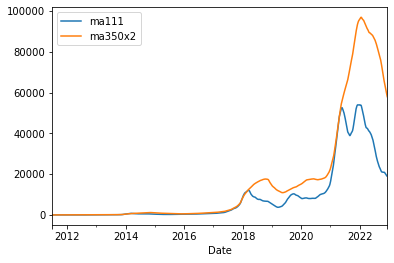

In [85]:
# plot address data
piCycleData.plot()